In [15]:
import pandas as pd
from collections import defaultdict
from positionism.read import coordinate_and_el, metainfo
from pymatgen.core.structure import Structure
from pymatgen.io.cif import CifWriter
import os
import numpy as np
from positionism.functional import func_kmeans

direc = os.getcwd() # get current working directory

In [16]:
pkl_name_wo_pkl = "file_loc_important_cols_0.051_Li6PS5Cl_optitype1n2_strictr_a_type4_weirdo1_var2_opti_zoomedin_800K"

dataframe = pd.read_pickle(f"{pkl_name_wo_pkl}.pkl")
dataframe_new = dataframe.copy()

In [17]:
def get_occupancy(dataframe, coor_structure_init_dict_expanded, tuple_metainfo, el):
    """
    strict_count: True or False
    """

    col_idx_coor_limapped_weirdos_dict = "idx_coor_limapped_weirdos_dict"
    col_sum_of_weirdos_Li = f"#weirdos_Li"

    col_occupancy_strict = "occupancy_strict"
    col_occupancy_notstrict = "occupancy_notstrict"
    col_idx_coor24li_tuple_cage_belongin_empty = "idx_coor24li_tuple_cage_belongin_empty"

    dataframe[col_occupancy_strict] = [{} for _ in range(len(dataframe.index))]
    dataframe[col_occupancy_notstrict] = [{} for _ in range(len(dataframe.index))]
    dataframe[col_idx_coor24li_tuple_cage_belongin_empty] = [{} for _ in range(len(dataframe.index))]

    coor_structure_init_dict_expanded_el = coor_structure_init_dict_expanded[el]
    coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]

    # for idx in [4]: 
    for idx in range(dataframe["geometry"].size):
        idx_coor24li_tuple_cage_belongin_empty = defaultdict(list)
        temp_idxtuple_coor24li_cage_belongin_empty = defaultdict(list)

        idx_coor_limapped_weirdos_dict = dataframe.at[idx, col_idx_coor_limapped_weirdos_dict]

        # # # file_24Li = f"{int(dataframe['geometry'][idx])}_{int(dataframe['path'][idx])}_{var_filename}.cif"
        # # # file_path_24Li = os.path.join(destination_directory, file_24Li)

        # # # coor_structure_24Li_dict_el = ReadStructure.Coor.get_coor_structure_init_dict(Structure.from_file(file_path_24Li))[el]
        
        # # # # Convert lists of arrays to sets for efficient comparison
        # # # set_coor_structure = set(map(tuple, coor_structure_24Li_dict_el))
        # # # set_coor_li48htype1_ref = set(map(tuple, coor_li48htype1_ref))

        # # # # Find the difference between the two sets
        # # # result_set = set_coor_structure.difference(set_coor_li48htype1_ref)

        # # # # Convert the result back to a list of arrays
        # # # result_list = list(map(np.array, result_set))
        # for idx_triad, val in tuple_metainfo.items():

        for idx_triad, values_list in tuple_metainfo.items():
            idx_coor24li_tuple_cage_belongin_empty[idx_triad] = []    # idx_atom as the actual index
            temp_idxtuple_coor24li_cage_belongin_empty[idx_triad] = []

            for entry in values_list:

                coor_metainfo = entry['coor']
                coor_metainfo_rounded = tuple(round(coordinate, 5) for coordinate in coor_metainfo)
                
                # for i in result_list:
                for idx_atom, values_list_atom in idx_coor_limapped_weirdos_dict.items():

                    coor_li_mapped = values_list_atom['coor']
                    coor_li_mapped_rounded = tuple(round(coordinate, 5) for coordinate in coor_li_mapped)
            
                    if (coor_li_mapped_rounded == coor_metainfo_rounded):
                        # if (tuple(i) == tuple(coor_metainfo_rounded)).all():
                        # coor24li_tuple_belongin_dict = {'coor': i, 'type':entry['type']}
                        idx_coor24li_tuple_cage_belongin_empty_dict = {'coor': coor_li_mapped_rounded, 'type':entry['type'], 'idx_tuple':idx_triad, 'idx_cage':entry['idx_cage']}
                        idx_coor24li_tuple_cage_belongin_empty[idx_atom].append(idx_coor24li_tuple_cage_belongin_empty_dict)        # changed into idx_atom

                        temp_idxtuple_coor24li_cage_belongin_empty_dict = {'coor': coor_li_mapped_rounded, 'type':entry['type'], 'idx_cage':entry['idx_cage']}
                        temp_idxtuple_coor24li_cage_belongin_empty[idx_triad].append(temp_idxtuple_coor24li_cage_belongin_empty_dict)        # changed into idx_atom

        # idx_coor_weirdos_Li_dict = dataframe['idx_coor_weirdos_Li'][idx]

        # for idx_weirdo, values_list in idx_coor_weirdos_Li_dict.items():
        #         coorweirdo_tuple_belongin_dict = {'coor': values_list, 'type':'weirdo'}
        #         idx_coor24li_tuple_cage_belongin_empty['weirdo'].append(coorweirdo_tuple_belongin_dict)
        
        # for key, val in idx_coor24li_tuple_cage_belongin_empty.items():
        #     for i

        len_occupancy = []
        for key, val in temp_idxtuple_coor24li_cage_belongin_empty.items():
            len_occupancy.append(len(val))

        # Initialize a counter
        amount_48htype1 = 0
        # # amount_weirdo = 0

        # Iterate through each key and list in the dictionary
        for key, list_of_dicts in idx_coor_limapped_weirdos_dict.items():
            # Iterate through each dictionary in the list
            # # for item in list_of_dicts:
            # Check if the 'type' is '48htype1'
            if list_of_dicts['label'] == '48htype1':
                # Increment the counter
                amount_48htype1 += 1
                    # if amount_48htype1 == 1:
                    #     print('true')
                # # if item['type'] == 'weirdo':
                # #     # Increment the counter
                # #     amount_weirdo += 1

        # print(amount_48htype1)
        # amount_48htype1 = (len(coor_structure_24Li_dict_el)-len(result_list))
        amount_weirdo = dataframe[col_sum_of_weirdos_Li][idx]
        occupancy_2 = len_occupancy.count(2)
        occupancy_1 = len_occupancy.count(1)

        occupancy_0_strict = len_occupancy.count(0)
        occupancy_0_notstrict = len_occupancy.count(0) - amount_48htype1 - amount_weirdo

        # sanity_check_occupancy = occupancy_2 * 2 + occupancy_1 + amount_48htype1 + amount_weirdo + occupancy_0

        # if sanity_check_occupancy != 24:
        #     print(f'sum of occupancy not achieved at idx {idx}')
        #     sys.exit()

        # print(f"idx: {idx}")

        # if sanity_check_occupancy != 24:
        #     sys.exit()

        occupancy_strict = {'2': occupancy_2, '1': occupancy_1, '0': occupancy_0_strict, '48htype1': amount_48htype1,'weirdo': amount_weirdo}
        occupancy_notstrict = {'2': occupancy_2, '1': occupancy_1, '0': occupancy_0_notstrict, '48htype1': amount_48htype1,'weirdo': amount_weirdo}

        dataframe.at[idx, col_occupancy_strict] = occupancy_strict
        dataframe.at[idx, col_occupancy_notstrict] = occupancy_notstrict
        dataframe.at[idx, col_idx_coor24li_tuple_cage_belongin_empty] = idx_coor24li_tuple_cage_belongin_empty


/home/azka/anaconda3/envs/positionism/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


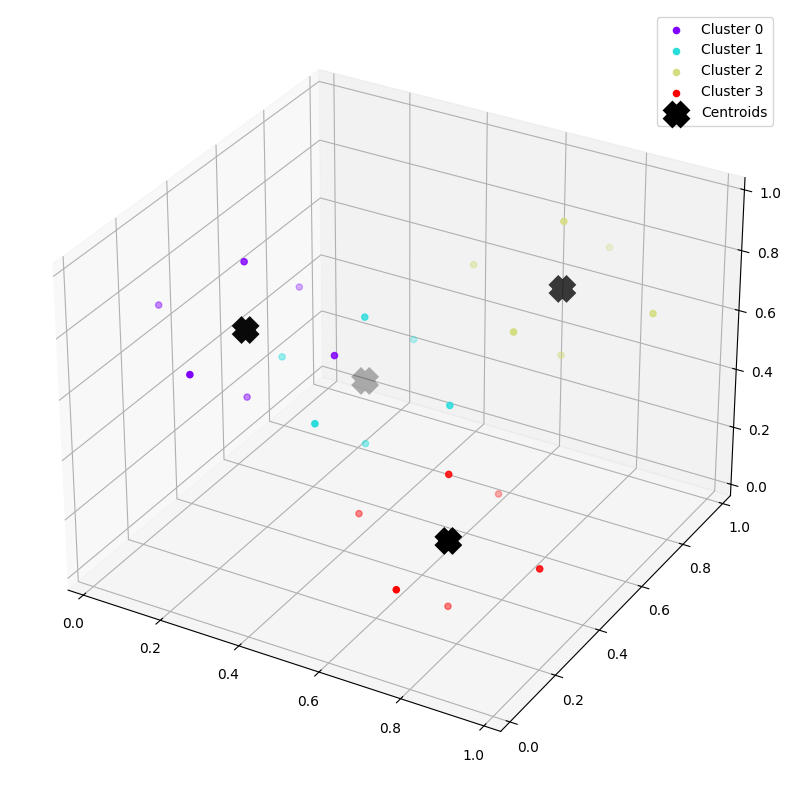

In [18]:
max_mapping_radius = 0.051
litype = 4

file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type4"
file_perfect_poscar_48n24 = f"{file_perfect_poscar_48n24_wo_cif}.cif"

folder_name_perfect_poscar = "/_reference_cif/"
folder_name_destination_restructure = f"/"


direc_perfect_poscar = direc+str(folder_name_perfect_poscar)
direc_restructure_destination = direc+str(folder_name_destination_restructure)
path_perfect_poscar_48n24 = os.path.join(direc_perfect_poscar, file_perfect_poscar_48n24)

ref_structure_48n24 = Structure.from_file(path_perfect_poscar_48n24)
cif_structure = Structure(ref_structure_48n24.lattice, ref_structure_48n24.species, ref_structure_48n24.frac_coords)
cif = CifWriter(cif_structure)
cif.write_file(f"{direc_restructure_destination}{file_perfect_poscar_48n24_wo_cif}_expanded.cif")
coor_ref_structure_48n24_expanded = coordinate_and_el.single_structure(Structure.from_file(f"{direc_restructure_destination}{file_perfect_poscar_48n24_wo_cif}_expanded.cif"))

tuple_metainfo = metainfo.tuple(coor_ref_structure_48n24_expanded, litype, el = "Li")
# coor_48htype1_metainfo = metainfo.coor_48htype2(coor_ref_structure_48n24_expanded, el = 'Li')

# file_loc_important_cols_sorted = file_loc_important_cols.sort_values("toten [eV]", ascending=True).reset_index()

idx_coor_cage_order = {0: np.array([0.97111, 0.25   , 0.25   ]), 3: np.array([0.02889, 0.75   , 0.25   ]),
                       1: np.array([0.02889, 0.25   , 0.75   ]), 2: np.array([0.97111, 0.75   , 0.75   ])}

coor_24g_array = np.array([item['coor'] for sublist in tuple_metainfo.values() for item in sublist if item['type'] == '24g'])
centroids, labels = func_kmeans.kmeans_cluster_atoms(coor_24g_array, amount_clusters = 4)
# func_kmeans.create_POSCAR_atoms_centroids_appended(coor_24g_array, centroids, direc_restructure_destination, lattice_constant, filename = "POSCAR_24g_centroids4")

idx_cage_coor_24g = metainfo.idx_cage_coor_24g(coor_24g_array, labels, idx_coor_cage_order, amount_clusters = 4)
tuple_cage_metainfo = metainfo.tuple_cage(tuple_metainfo, idx_cage_coor_24g)


In [19]:
get_occupancy(dataframe_new, coor_ref_structure_48n24_expanded, tuple_cage_metainfo, el = "Li")

In [23]:
print(f"occupancy and occupancy strict columns are same: {(dataframe['occupancy'] == dataframe_new['occupancy_strict']).all()}")
print(f"idx_coor_limapped_weirdos_dict columns are same: {(dataframe['idx_coor_limapped_weirdos_dict'] == dataframe_new['idx_coor_limapped_weirdos_dict']).all()}")
print(f"#weirdos_Li columns are same: {(dataframe['#weirdos_Li'] == dataframe_new['#weirdos_Li']).all()}")

occupancy and occupancy strict columns are same: True
idx_coor_limapped_weirdos_dict columns are same: True
#weirdos_Li columns are same: True


In [ ]:
dataframe_new.to_pickle(f'{pkl_name_wo_pkl}_strict_notstrict.pkl') 